# Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Drop cột nhiều giá trị null

In [7]:
col_drop_null=[]
for col in train_data.columns:
    if train_data[col].isnull().sum()>500:
        col_drop_null.append(col)
        train_data.drop(columns=[col],inplace=True)

col_drop_null

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

## Drop cột nhiều giá trị 0

In [8]:

def drop_zero_columns(df,threhold_ratio=0.5):
    n_rows=len(df)
    cols_to_drop = []

    for col in df.columns:
        zero_count=(df[col]==0).sum()
        if zero_count / n_rows > threhold_ratio:
            cols_to_drop.append(col)

    df.drop(columns=cols_to_drop,inplace=True)
    return cols_to_drop

dropped_cols=drop_zero_columns(train_data,threhold_ratio=0.5)
print(f"Dropped columns: {dropped_cols}")




Dropped columns: ['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [9]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,548,TA,TA,Y,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,608,TA,TA,Y,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,836,TA,TA,Y,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,460,TA,TA,Y,40,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,500,TA,TA,Y,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,252,TA,TA,Y,60,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,240,TA,TA,Y,0,4,2010,WD,Normal,142125


In [15]:
features_number = []
features_object = []
for col in train_data.columns:
    if train_data[col].dtype != 'object':
        features_number.append(col)
    else:
        features_object.append(col)


feature_engineered = []

for col in features_number:
    if abs(train_data[features_number].corr()['SalePrice'][col]) > 0.5:
        feature_engineered.append(col)
features_object

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

<Axes: >

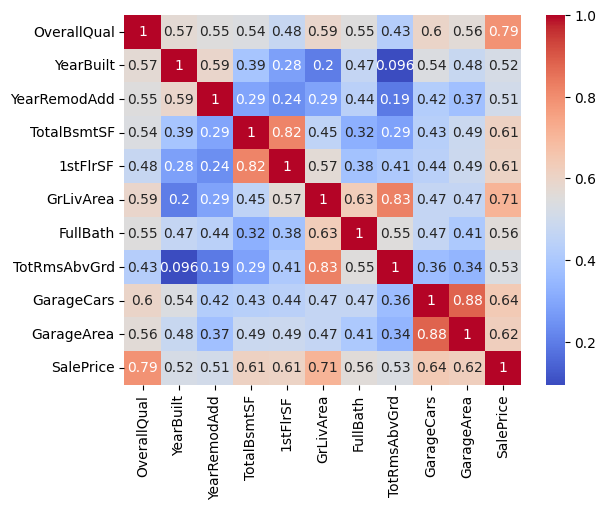

In [16]:
sns.heatmap(train_data[feature_engineered].corr(),annot=True,cmap='coolwarm')

In [17]:
for col in features_object:
    print(f"------ {col} ------")
    vc=train_data[col].value_counts(normalize=False)
    vc_percent=train_data[col].value_counts(normalize=True)

    df=pd.DataFrame({
        "count" : vc,
        "percent": vc_percent
    }).head(5)

    print(df)
    print("\n")

------ MSZoning ------
          count   percent
MSZoning                 
RL         1151  0.788356
RM          218  0.149315
FV           65  0.044521
RH           16  0.010959
C (all)      10  0.006849


------ Street ------
        count  percent
Street                
Pave     1454  0.99589
Grvl        6  0.00411


------ LotShape ------
          count   percent
LotShape                 
Reg         925  0.633562
IR1         484  0.331507
IR2          41  0.028082
IR3          10  0.006849


------ LandContour ------
             count   percent
LandContour                 
Lvl           1311  0.897945
Bnk             63  0.043151
HLS             50  0.034247
Low             36  0.024658


------ Utilities ------
           count   percent
Utilities                 
AllPub      1459  0.999315
NoSeWa         1  0.000685


------ LotConfig ------
           count   percent
LotConfig                 
Inside      1052  0.720548
Corner       263  0.180137
CulDSac       94  0.064384
FR

In [18]:
features_ob = ['BsmtExposure','BsmtFinType1','BsmtQual','Exterior1st','Exterior2nd','ExterQual','Foundation','GarageFinish','GarageType','HeatingQC','HouseStyle','KitchenQual','LandSlope','LotConfig','LotShape','MSZoning','Neighborhood','RoofStyle','SaleCondition','YrSold']
features =   feature_engineered + features_ob

train_X = train_data[features]

features_no_target = [c for c in features if c != 'SalePrice']
test_X = test_data[features_no_target]

features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtQual',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'GarageFinish',
 'GarageType',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'Neighborhood',
 'RoofStyle',
 'SaleCondition',
 'YrSold']

In [22]:
train_data_clean = pd.read_csv("train.csv")
test_data_clean = pd.read_csv("test.csv")

# Drop null columns (giống như ban đầu)
for col in train_data_clean.columns:
    if train_data_clean[col].isnull().sum() > 500:
        train_data_clean.drop(columns=[col], inplace=True)

# Drop zero columns
def drop_zero_columns(df, threshold_ratio=0.5):
    n_rows = len(df)
    cols_to_drop = []
    for col in df.columns:
        zero_count = (df[col] == 0).sum()
        if zero_count / n_rows > threshold_ratio:
            cols_to_drop.append(col)
    df.drop(columns=cols_to_drop, inplace=True)
    return cols_to_drop

drop_zero_columns(train_data_clean, threshold_ratio=0.5)

['MasVnrArea',
 'BsmtFinSF2',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [23]:
# ===== TẠO FUNCTION XỬ LÝ FEATURE ĐỂ TRÁNH DATA LEAKAGE =====
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

def feature_engineering(train_df, test_df, target_col='SalePrice'):
    """
    Xử lý feature engineering đúng cách:
    - Fit trên train, transform cả train và test
    - Mỗi scaler riêng biệt cho từng feature
    """
    # Lấy features đã chọn
    features_ob = ['BsmtExposure','BsmtFinType1','BsmtQual','Exterior1st','Exterior2nd',
                   'ExterQual','Foundation','GarageFinish','GarageType','HeatingQC',
                   'HouseStyle','KitchenQual','LandSlope','LotConfig','LotShape',
                   'MSZoning','Neighborhood','RoofStyle','SaleCondition','YrSold']
    
    features_num = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
                    'GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']
    
    all_features = features_num + features_ob + [target_col]
    train_X = train_df[all_features].copy()
    
    features_no_target = [c for c in all_features if c != target_col]
    test_X = test_df[features_no_target].copy()
    
    # 1. BsmtFinType1
    col_BsmtFinType1 = {'Unf': 1, 'GLQ': 2, 'ALQ': 3, 'BLQ': 3, 'Rec': 3, 'LwQ': 3}
    train_X['BsmtFinType1'] = train_X['BsmtFinType1'].map(col_BsmtFinType1).fillna(4)
    test_X['BsmtFinType1'] = test_X['BsmtFinType1'].map(col_BsmtFinType1).fillna(4)
    
    # 2. BsmtExposure
    col_BsmtExposure = {'No': 1, 'Av': 2, 'Mn': 2, 'Gd': 3}
    train_X['BsmtExposure'] = train_X['BsmtExposure'].map(col_BsmtExposure).fillna(4)
    test_X['BsmtExposure'] = test_X['BsmtExposure'].map(col_BsmtExposure).fillna(4)
    
    # 3. BsmtQual
    col_BsmtQual = {'TA': 1, 'Fa': 1, 'Gd': 2, 'Ex': 3}
    train_X['BsmtQual'] = train_X['BsmtQual'].map(col_BsmtQual).fillna(train_X['BsmtQual'].mode().iloc[0] if len(train_X['BsmtQual'].mode()) > 0 else 1)
    test_X['BsmtQual'] = test_X['BsmtQual'].map(col_BsmtQual).fillna(test_X['BsmtQual'].mode().iloc[0] if len(test_X['BsmtQual'].mode()) > 0 else 1)
    
    # 4. Exterior1st
    train_X['Exterior1st'] = train_X['Exterior1st'].apply(lambda x: x if x in ['VinylSd','MetalSd','Wd Sdng','HdBoard','Plywood','Stucco'] else 'others')
    test_X['Exterior1st'] = test_X['Exterior1st'].apply(lambda x: x if x in ['VinylSd','MetalSd','Wd Sdng','HdBoard','Plywood','Stucco'] else 'others')
    col_Exterior1st = {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 2, 'HdBoard': 2, 'Plywood': 2, 'Stucco': 2, 'others': 3}
    train_X['Exterior1st'] = train_X['Exterior1st'].map(col_Exterior1st)
    test_X['Exterior1st'] = test_X['Exterior1st'].map(col_Exterior1st).fillna(test_X['Exterior1st'].mode().iloc[0] if len(test_X['Exterior1st'].mode()) > 0 else 1)
    
    # 5. Exterior2nd
    train_X['Exterior2nd'] = train_X['Exterior2nd'].apply(lambda x: x if x in ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood'] else 'others')
    test_X['Exterior2nd'] = test_X['Exterior2nd'].apply(lambda x: x if x in ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood'] else 'others')
    col_Exterior2nd = {'VinylSd': 1, 'MetalSd': 2, 'HdBoard': 3, 'Wd Sdng': 4, 'Plywood': 5, 'others': 6}
    train_X['Exterior2nd'] = train_X['Exterior2nd'].map(col_Exterior2nd)
    test_X['Exterior2nd'] = test_X['Exterior2nd'].map(col_Exterior2nd)
    
    # 6. ExterQual
    train_X['ExterQual'] = train_X['ExterQual'].apply(lambda x: x if x in ['TA','Gd'] else 'others')
    test_X['ExterQual'] = test_X['ExterQual'].apply(lambda x: x if x in ['TA','Gd'] else 'others')
    col_ExterQual = {'TA': 1, 'Gd': 2, 'others': 3}
    train_X['ExterQual'] = train_X['ExterQual'].map(col_ExterQual)
    test_X['ExterQual'] = test_X['ExterQual'].map(col_ExterQual)
    
    # 7. Foundation
    train_X['Foundation'] = train_X['Foundation'].apply(lambda x: x if x in ['PConc','CBlock','BrkTil'] else 'others')
    test_X['Foundation'] = test_X['Foundation'].apply(lambda x: x if x in ['PConc','CBlock','BrkTil'] else 'others')
    col_Foundation = {'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'others': 4}
    train_X['Foundation'] = train_X['Foundation'].map(col_Foundation)
    test_X['Foundation'] = test_X['Foundation'].map(col_Foundation)
    
    # 8. GarageFinish
    train_X['GarageFinish'] = train_X['GarageFinish'].fillna('others')
    test_X['GarageFinish'] = test_X['GarageFinish'].fillna('others')
    col_GarageFinish = {'Unf': 1, 'RFn': 2, 'Fin': 3, 'others': 4}
    train_X['GarageFinish'] = train_X['GarageFinish'].map(col_GarageFinish)
    test_X['GarageFinish'] = test_X['GarageFinish'].map(col_GarageFinish)
    
    # 9. GarageType
    train_X['GarageType'] = train_X['GarageType'].apply(lambda x: x if x in ['Attchd','Detchd'] else 'others')
    test_X['GarageType'] = test_X['GarageType'].apply(lambda x: x if x in ['Attchd','Detchd'] else 'others')
    col_GarageType = {'Attchd': 1, 'Detchd': 2, 'others': 3}
    train_X['GarageType'] = train_X['GarageType'].map(col_GarageType)
    test_X['GarageType'] = test_X['GarageType'].map(col_GarageType)
    
    # 10. HeatingQC
    train_X['HeatingQC'] = train_X['HeatingQC'].apply(lambda x: x if x in ['Ex','TA','Gd'] else 'others')
    test_X['HeatingQC'] = test_X['HeatingQC'].apply(lambda x: x if x in ['Ex','TA','Gd'] else 'others')
    col_HeatingQC = {'Ex': 1, 'TA': 2, 'Gd': 3, 'others': 4}
    train_X['HeatingQC'] = train_X['HeatingQC'].map(col_HeatingQC)
    test_X['HeatingQC'] = test_X['HeatingQC'].map(col_HeatingQC)
    
    # 11. HouseStyle
    train_X['HouseStyle'] = train_X['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story','1.5Fin'] else 'others')
    test_X['HouseStyle'] = test_X['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story','1.5Fin'] else 'others')
    col_HouseStyle = {'1Story': 1, '2Story': 2, '1.5Fin': 3, 'others': 4}
    train_X['HouseStyle'] = train_X['HouseStyle'].map(col_HouseStyle)
    test_X['HouseStyle'] = test_X['HouseStyle'].map(col_HouseStyle)
    
    # 12. KitchenQual
    train_X['KitchenQual'] = train_X['KitchenQual'].apply(lambda x: x if x in ['TA','Gd','Ex'] else 'others')
    test_X['KitchenQual'] = test_X['KitchenQual'].apply(lambda x: x if x in ['TA','Gd','Ex'] else 'others')
    col_KitchenQual = {'TA': 1, 'Gd': 2, 'Ex': 3, 'others': 4}
    train_X['KitchenQual'] = train_X['KitchenQual'].map(col_KitchenQual)
    test_X['KitchenQual'] = test_X['KitchenQual'].map(col_KitchenQual)
    
    # 13. LandSlope - DROP (mất cân bằng)
    train_X = train_X.drop(columns=['LandSlope'])
    test_X = test_X.drop(columns=['LandSlope'])
    
    # 14. LotConfig
    train_X['LotConfig'] = train_X['LotConfig'].apply(lambda x: x if x in ['Inside','Corner'] else 'others')
    test_X['LotConfig'] = test_X['LotConfig'].apply(lambda x: x if x in ['Inside','Corner'] else 'others')
    col_LotConfig = {'Inside': 1, 'Corner': 2, 'others': 3}
    train_X['LotConfig'] = train_X['LotConfig'].map(col_LotConfig)
    test_X['LotConfig'] = test_X['LotConfig'].map(col_LotConfig)
    
    # 15. LotShape
    train_X['LotShape'] = train_X['LotShape'].apply(lambda x: x if x in ['Reg','IR1'] else 'others')
    test_X['LotShape'] = test_X['LotShape'].apply(lambda x: x if x in ['Reg','IR1'] else 'others')
    col_LotShape = {'Reg': 1, 'IR1': 2, 'others': 3}
    train_X['LotShape'] = train_X['LotShape'].map(col_LotShape)
    test_X['LotShape'] = test_X['LotShape'].map(col_LotShape)
    
    # 16. MSZoning
    train_X['MSZoning'] = train_X['MSZoning'].apply(lambda x: x if x in ['RL','RM'] else 'others')
    test_X['MSZoning'] = test_X['MSZoning'].apply(lambda x: x if x in ['RL','RM'] else 'others')
    col_MSZoning = {'RL': 1, 'RM': 2, 'others': 3}
    train_X['MSZoning'] = train_X['MSZoning'].map(col_MSZoning)
    test_X['MSZoning'] = test_X['MSZoning'].map(col_MSZoning)
    
    # 17. Neighborhood - Target Encoding
    low_freq = train_X['Neighborhood'].value_counts()[train_X['Neighborhood'].value_counts() < 20].index
    train_X['Neighborhood'] = train_X['Neighborhood'].replace(low_freq, 'Other')
    low_freq1 = test_X['Neighborhood'].value_counts()[test_X['Neighborhood'].value_counts() < 20].index
    test_X['Neighborhood'] = test_X['Neighborhood'].replace(low_freq1, 'Other')
    
    te = TargetEncoder(cols=['Neighborhood'])
    train_X['Neighborhood'] = te.fit_transform(train_X['Neighborhood'], train_X[target_col])
    test_X['Neighborhood'] = te.transform(test_X['Neighborhood'])
    
    scaler_neighborhood = StandardScaler()
    train_X['Neighborhood'] = scaler_neighborhood.fit_transform(train_X[['Neighborhood']])
    test_X['Neighborhood'] = scaler_neighborhood.transform(test_X[['Neighborhood']])
    
    # 18. RoofStyle
    train_X['RoofStyle'] = train_X['RoofStyle'].apply(lambda x: x if x in ['Gable','Hip'] else 'others')
    test_X['RoofStyle'] = test_X['RoofStyle'].apply(lambda x: x if x in ['Gable','Hip'] else 'others')
    col_RoofStyle = {'Gable': 1, 'Hip': 2, 'others': 3}
    train_X['RoofStyle'] = train_X['RoofStyle'].map(col_RoofStyle)
    test_X['RoofStyle'] = test_X['RoofStyle'].map(col_RoofStyle)
    
    # 19. SaleCondition
    train_X['SaleCondition'] = train_X['SaleCondition'].apply(lambda x: x if x in ['Normal','Partial','Abnorml'] else 'others')
    test_X['SaleCondition'] = test_X['SaleCondition'].apply(lambda x: x if x in ['Normal','Partial','Abnorml'] else 'others')
    col_SaleCondition = {'Normal': 1, 'Partial': 2, 'Abnorml': 3, 'others': 4}
    train_X['SaleCondition'] = train_X['SaleCondition'].map(col_SaleCondition)
    test_X['SaleCondition'] = test_X['SaleCondition'].map(col_SaleCondition)
    
    # === FEATURE ENGINEERING ===
    
    # 21. HouseAge (YrSold - YearBuilt)
    train_X['HouseAge'] = train_X['YrSold'] - train_X['YearBuilt']
    test_X['HouseAge'] = test_X['YrSold'] - test_X['YearBuilt']
    scaler_age = StandardScaler()
    train_X['HouseAge'] = scaler_age.fit_transform(train_X[['HouseAge']])
    test_X['HouseAge'] = scaler_age.transform(test_X[['HouseAge']])
    
    # 22. IsRemodeled
    train_X['IsRemodeled'] = (train_X['YearRemodAdd'] != train_X['YearBuilt']).astype(int)
    test_X['IsRemodeled'] = (test_X['YearRemodAdd'] != test_X['YearBuilt']).astype(int)
    
    # 23. TotalBsmtSF
    scaler_bsmt = StandardScaler()
    train_X['TotalBsmtSF'] = scaler_bsmt.fit_transform(train_X[['TotalBsmtSF']])
    test_X['TotalBsmtSF'] = scaler_bsmt.transform(test_X[['TotalBsmtSF']])
    
    # 24. 1stFlrSF
    scaler_1st = StandardScaler()
    train_X['1stFlrSF'] = scaler_1st.fit_transform(train_X[['1stFlrSF']])
    test_X['1stFlrSF'] = scaler_1st.transform(test_X[['1stFlrSF']])
    
    # 25. GrLivArea
    scaler_grliv = StandardScaler()
    train_X['GrLivArea'] = scaler_grliv.fit_transform(train_X[['GrLivArea']])
    test_X['GrLivArea'] = scaler_grliv.transform(test_X[['GrLivArea']])
    
    # 26. Has3FullBath
    train_X['Has3FullBath'] = (train_X['FullBath'] >= 3).astype(int)
    test_X['Has3FullBath'] = (test_X['FullBath'] >= 3).astype(int)
    
    # 27. TotRms_group
    bins = [0, 4, 7, 100]
    labels = ['small', 'medium', 'large']
    train_X['TotRms_group'] = pd.cut(train_X['TotRmsAbvGrd'], bins=bins, labels=labels)
    test_X['TotRms_group'] = pd.cut(test_X['TotRmsAbvGrd'], bins=bins, labels=labels)
    
    train_X = pd.get_dummies(train_X, columns=['TotRms_group'], drop_first=True)
    test_X = pd.get_dummies(test_X, columns=['TotRms_group'], drop_first=True)
    
    dummy_cols = [c for c in train_X.columns if 'TotRms_group' in c]
    train_X[dummy_cols] = train_X[dummy_cols].astype(int)
    test_X[dummy_cols] = test_X[dummy_cols].astype(int)
    
    # 28. has3Garage
    train_X['has3Garage'] = (train_X['GarageCars'] == 3).astype(int)
    test_X['has3Garage'] = (test_X['GarageCars'] == 3).astype(int)
    
    # 29. GarageArea_per_car
    train_X['GarageArea_per_car'] = (train_X['GarageArea'] / (train_X['GarageCars'] + 1))
    test_X['GarageArea_per_car'] = (test_X['GarageArea'] / (test_X['GarageCars'] + 1))
    
    scaler_garage = StandardScaler()
    train_X[['GarageArea', 'GarageArea_per_car']] = scaler_garage.fit_transform(train_X[['GarageArea', 'GarageArea_per_car']])
    test_X[['GarageArea', 'GarageArea_per_car']] = scaler_garage.transform(test_X[['GarageArea', 'GarageArea_per_car']])
    
    # Drop các cột không cần thiết
    drop_cols = ['YearBuilt', 'YrSold', 'YearRemodAdd', 'TotRmsAbvGrd']
    train_X = train_X.drop(columns=drop_cols)
    test_X = test_X.drop(columns=drop_cols)
    
    return train_X, test_X

print("✅ Function feature_engineering created successfully")

✅ Function feature_engineering created successfully


In [24]:
# ===== APPLY FEATURE ENGINEERING =====
train_X_fixed, test_X_fixed = feature_engineering(train_data_clean, test_data_clean, target_col='SalePrice')

print("\n✅ Feature engineering completed!")
print(f"Train shape: {train_X_fixed.shape}")
print(f"Test shape: {test_X_fixed.shape}")
print(f"\nColumns in train: {train_X_fixed.columns.tolist()}")


✅ Feature engineering completed!
Train shape: (1460, 33)
Test shape: (1459, 32)

Columns in train: ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'GarageFinish', 'GarageType', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotConfig', 'LotShape', 'MSZoning', 'Neighborhood', 'RoofStyle', 'SaleCondition', 'SalePrice', 'HouseAge', 'IsRemodeled', 'Has3FullBath', 'TotRms_group_medium', 'TotRms_group_large', 'has3Garage', 'GarageArea_per_car']


In [26]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# ===== CHUẨN BỊ DATA =====
X = train_X_fixed.drop(columns=['SalePrice'])  # ✅ FIXED: bỏ target ra khỏi features
y_log = np.log1p(train_data_clean['SalePrice'])  # ✅ FIXED: dùng log transform

print(f"X shape: {X.shape}")
print(f"y shape: {y_log.shape}")
print(f"Columns in X: {X.columns.tolist()}")

# ===== MODELS =====
models = {
    "DecisionTree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "RandomForest": RandomForestRegressor(
        n_estimators=300, 
        max_depth=15,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ),
    "XGBRegressor": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist"
    )
}
from category_encoders import TargetEncoder

encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X, y_log)

# Custom RMSE scorer
def rmse_log(y_true, y_pred):
    """RMSE trên log scale (Kaggle metric)"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_log, greater_is_better=False)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*60)

for name, model in models.items():
    rmse_scores = -cross_val_score(model, X, y_log, scoring=rmse_scorer, cv=kf)
    r2_scores = cross_val_score(model, X, y_log, scoring='r2', cv=kf)
    
    print(f"\n===== {name} =====")
    print(f"RMSE (log) mean: {rmse_scores.mean():.6f} (+/- {rmse_scores.std():.6f})")
    print(f"R2 mean:         {r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")

print("\n" + "="*60)
print("✅ Cross-validation completed!")

X shape: (1460, 32)
y shape: (1460,)
Columns in X: ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'GarageFinish', 'GarageType', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotConfig', 'LotShape', 'MSZoning', 'Neighborhood', 'RoofStyle', 'SaleCondition', 'HouseAge', 'IsRemodeled', 'Has3FullBath', 'TotRms_group_medium', 'TotRms_group_large', 'has3Garage', 'GarageArea_per_car']

CROSS-VALIDATION RESULTS (5-Fold)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nhan/active/myenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nhan/active/myenv/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/nhan/active/myenv/lib/python3.13/site-packages/sklearn/tree/_classes.py", line 1404, in fit
    super()._fit(
    ~~~~~~~~~~~~^
        X,
        ^^
    ...<2 lines>...
        check_input=check_input,
        ^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/home/nhan/active/myenv/lib/python3.13/site-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = validate_data(
           ~~~~~~~~~~~~~^
        self, X, y, validate_separately=(check_X_params, check_y_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/home/nhan/active/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py", line 2966, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/home/nhan/active/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/home/nhan/active/myenv/lib/python3.13/site-packages/sklearn/utils/_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/home/nhan/active/myenv/lib/python3.13/site-packages/pandas/core/generic.py", line 2171, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'TA'
